In [2]:
import pandas as pd

# Load the dataset
file_path = '../../data/processed/merged_cycling_data.csv'
df = pd.read_csv(file_path)

C:\Users\singhg2\AppData\Local\Temp\ipykernel_30036\571548684.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# Convert datetime strings to datetime objects
df['datetime_bin_start'] = pd.to_datetime(df['datetime_bin_start'])
df.describe()





,_id,WARD,SDE_STATE_ID,index_right,centreline_id,daily_temperature,daily_precipitation,datetime_bin_start,volume,distance_meters
count,1.413834e+06,1.412826e+06,0.0,1.413834e+06,1.413834e+06,1.363648e+06,1.363648e+06,1413834,1.413834e+06,1.413834e+06
mean,8.671666e+03,1.126400e+01,NaN,1.232879e+04,1.018525e+07,2.053999e+01,2.236976e+00,2015-09-01 15:12:26.165957632,5.288107e+01,1.114198e+02
min,2.100000e+01,4.000000e+00,NaN,0.000000e+00,1.140250e+06,5.000000e+00,0.000000e+00,2010-03-17 00:00:00,0.000000e+00,8.132257e+00
25%,4.142000e+03,1.000000e+01,NaN,6.210000e+03,7.930588e+06,1.500000e+01,0.000000e+00,2014-07-15 05:00:00,8.000000e+00,6.617902e+01
50%,8.651000e+03,1.100000e+01,NaN,1.152000e+04,1.092345e+07,2.100000e+01,0.000000e+00,2016-06-10 10:00:00,2.800000e+01,1.136733e+02
75%,1.319000e+04,1.300000e+01,NaN,1.625800e+04,1.403606e+07,2.600000e+01,1.000000e+00,2017-06-18 14:00:00,7.200000e+01,1.575563e+02
max,1.748100e+04,1.900000e+01,NaN,2.804500e+04,3.006818e+07,3.700000e+01,5.800000e+01,2018-10-10 23:00:00,7.120000e+02,1.999175e+02
std,5.133416e+03,1.951824e+00,NaN,7.853402e+03,4.735366e+06,6.494107e+00,5.898343e+00,NaN,7.276931e+01,5.223066e+01


Time Series Plot of Cyclist Volume:

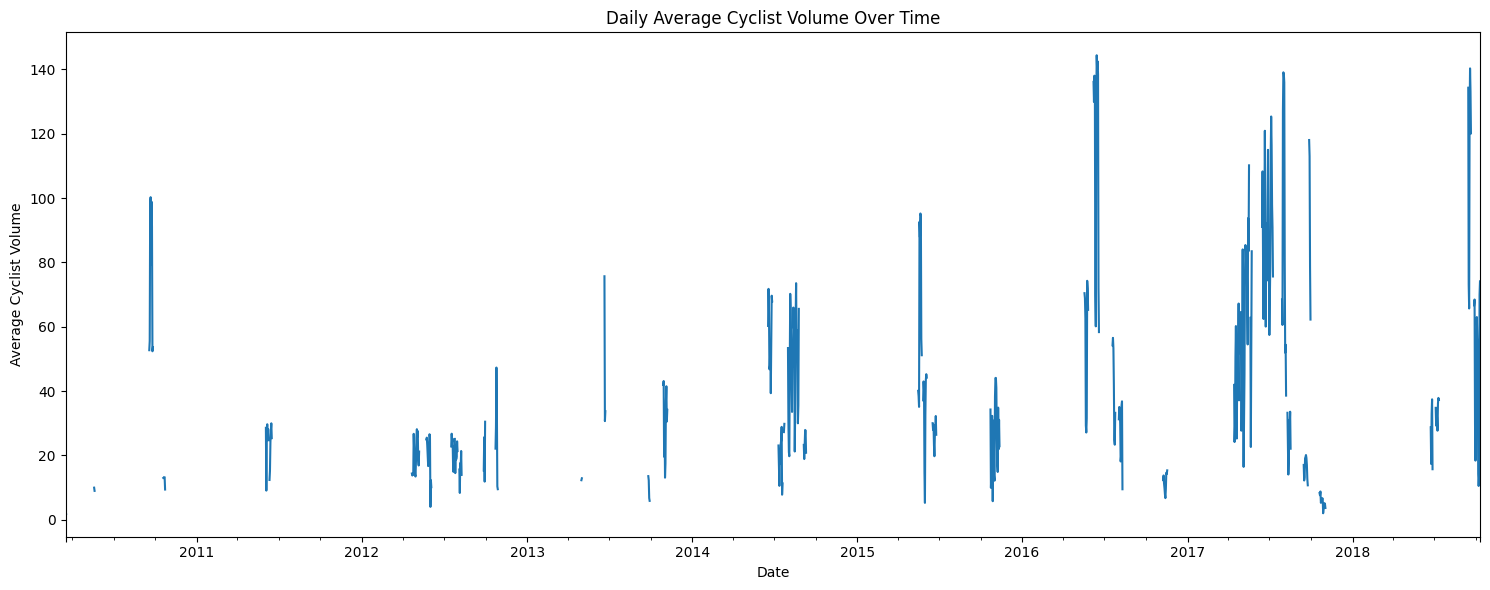

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df.set_index('datetime_bin_start')['volume'].resample('D').mean().plot()
plt.title('Daily Average Cyclist Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Cyclist Volume')
plt.tight_layout()
plt.show()

Heatmap of Cyclist Volume by Hour and Day of Week:

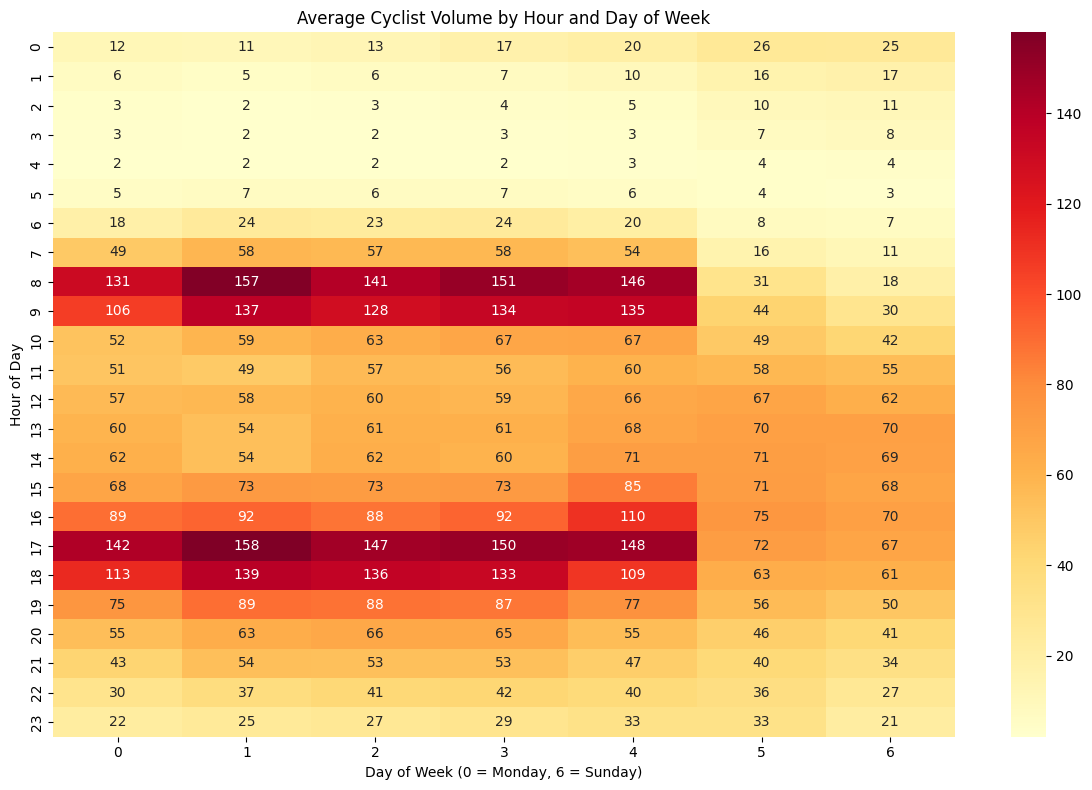

In [6]:
df['day_of_week'] = df['datetime_bin_start'].dt.dayofweek
df['hour'] = df['datetime_bin_start'].dt.hour

pivot = df.pivot_table(values='volume', index='hour', columns='day_of_week', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Cyclist Volume by Hour and Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

Box Plot of Cyclist Volume by Street:

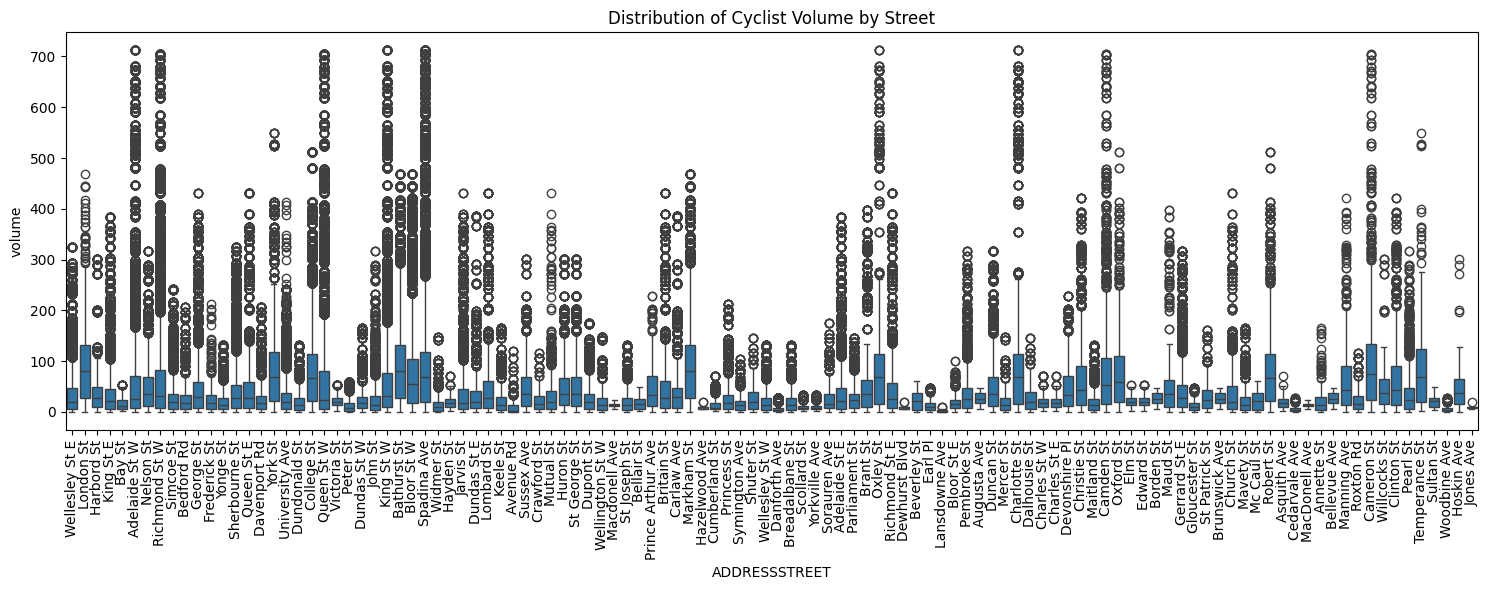

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='ADDRESSSTREET', y='volume', data=df)
plt.title('Distribution of Cyclist Volume by Street')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Scatter Plot of Temperature vs Cyclist Volume:

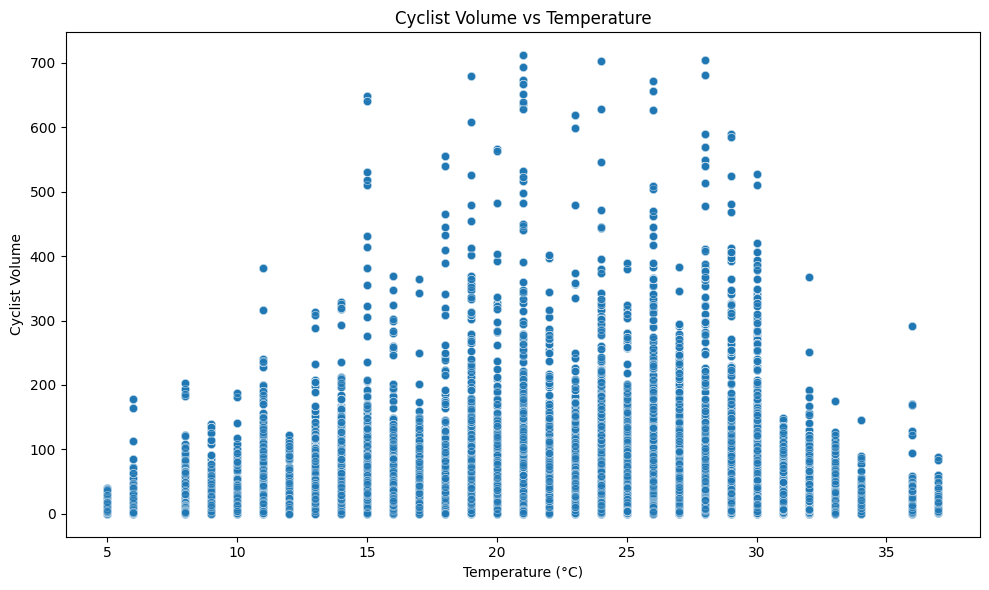

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daily_temperature', y='volume', data=df, alpha=0.5)
plt.title('Cyclist Volume vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Cyclist Volume')
plt.tight_layout()
plt.show()

Bar Plot of Average Cyclist Volume by Direction:

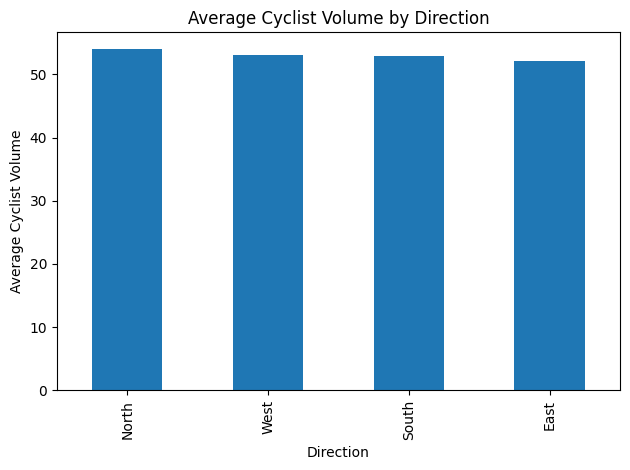

In [9]:
df.groupby('DIRECTION')['volume'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Cyclist Volume by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Cyclist Volume')
plt.tight_layout()
plt.show()

Pie Chart of Cyclist Volume Distribution by Ward:

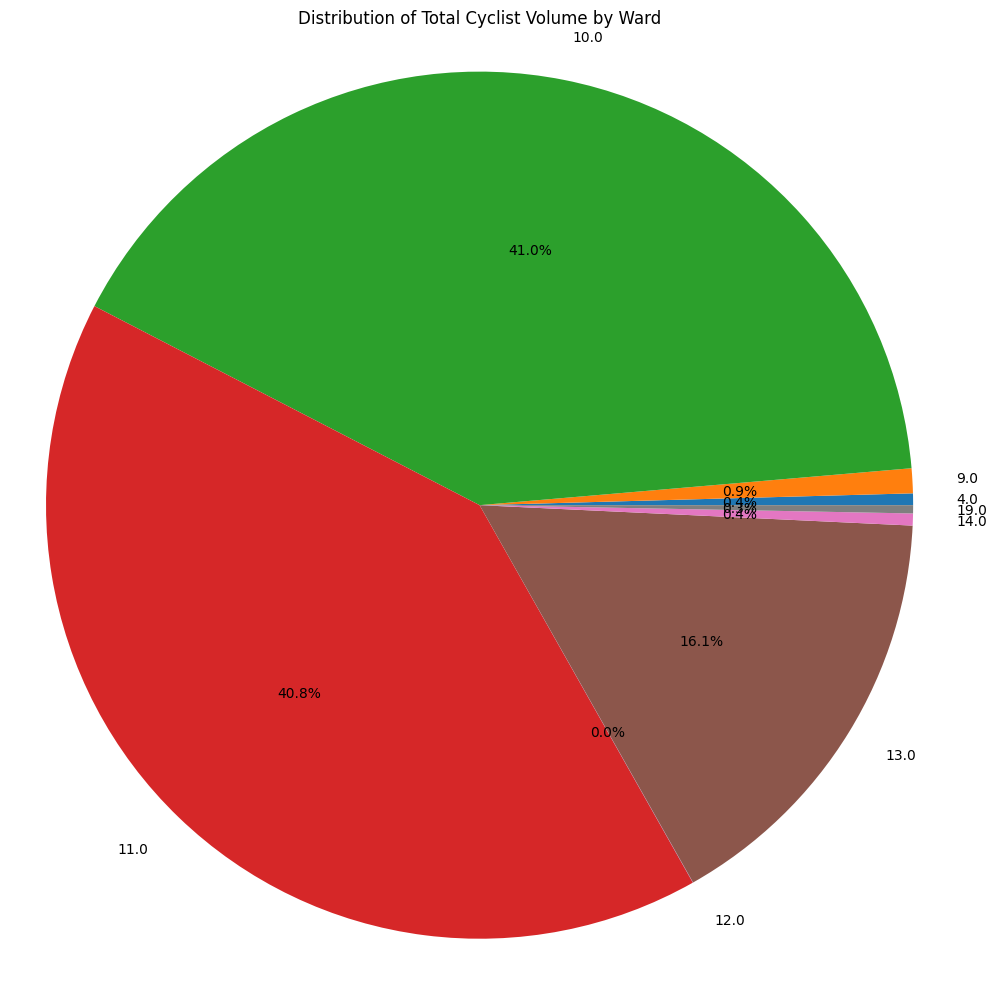

In [10]:
ward_volumes = df.groupby('WARD')['volume'].sum()
plt.figure(figsize=(10, 10))
plt.pie(ward_volumes, labels=ward_volumes.index, autopct='%1.1f%%')
plt.title('Distribution of Total Cyclist Volume by Ward')
plt.axis('equal')
plt.tight_layout()
plt.show()